🚩 앙상블 모형과 랜덤포레스트가 무엇인가?
* 어떠한 한 현상에 대한 답을 얻는다고 가정해보자, 많은 경우에 한 명의 전문가보다 여려 명의 일반인들의 의견이 더 나은 경우가 있다.
* 위 예제와 비슷하게, 하나의 좋은 모형(회귀,분류)으로부터 예측을 하는 것보다 여러 개의 모형으로부터 예측을 수집하는 것이 더 좋은 예측을 할 수 있다.
* 이러한 여러 개의 모형을 앙상블이라고 부르고, 여러 개의 모형을 조화롭게 학습시키는 것을 앙상블 학습이라고 한다.
* 그리고 6주차에서 배운 결정 트리 모형이 하나가 아니라, 훈련 세트를 무작위로 다른 서브셋으로 만들어서 결정 트리 분류기를 만들고, 많은 모형들 중에서 가장 많은 선택을 받은 클래스를 예측하는 앙상블 모형을 랜덤포레스트라고 한다.
* 오늘날의 랜덤포레스트 모델은 가장 강력한 머신러닝 알고리즘 하나이다.
* 그리고 머신러닝 대회에서 우승하는 솔루션들은 대부분 앙상블 방법을 사용하여서 최고 성능을 낸다.
뒤에서 앙상블 방법들 중 배깅, 부스팅, 스태킹을 설명할 것이다.

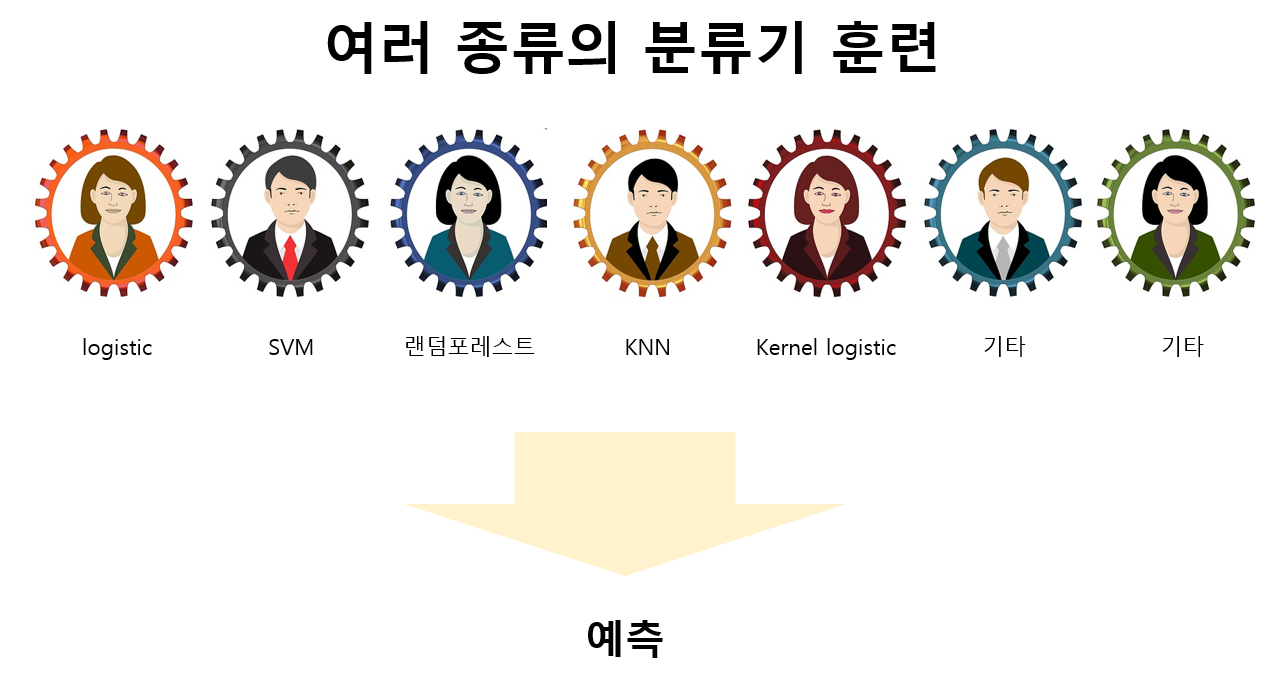

* 하나의 데이터셋을 여러종류의 분류기들로 훈련시켰다고 가정해보자.
* 위에서 언급한대로 하나의 좋은 모델을 사용하는 것보다, 여러 종류의 분류기들이 가장 많이 예측한 클래스를 예측하는 것이 더 좋은 분류기를 만드는 매우 간단한 방법이다.
* 이렇게 다수결의 투표로 정해지는 분류기를 hard voting(집접 투표) 분류기라고 한다.
* 놀랍게도 위 모델 중 가장 성능이 좋은 모델의 정확도보다 다수결을 통해 예측한 앙상블 모델의 성능이 높은 경우가 많다.
* 이렇게 랜덤 추측보다 조금 더 높은 성능을 내는 weak learner(약한 학습기) 가 충분히 많고 다양하다면 strong learner(강한 학습기)가 될 수 있다.

# Law of large numbers
* 어떻게 약한 학습기가 강한 학습기가 되어서 더 좋은 성능을 낼 수 있을까?, 이 질문은 "큰 수의 법칙"으로 설명될 수 있다.
* 먼저, 50:50의 동전이 아니라, 51:49의 불균형하게 앞면과 뒷면이 나오는 동전이 있다고 가정을 해보자.
* 이 동전을 1,000번을 던진다면 거의 앞면 510번과 뒷면 490번이 나올 것이다.
* 수학적으로 1,000번을 던졌을 때 앞면이 더 많게 나오는 확률은 거의 75% 정도 된다.
* 수학적으로 10,000번을 던졌을 때 앞면이 더 많게 나오는 확률은 거의 97% 정도 된다.
* 위 수학적 계산은 이항분포의 확률 질량 함수로 계산 가능하다. ex) 1-scipy.stats.binom.cdf(499,1000,0.51) = 0.747
* 위의 내용을 기반으로 우리의 약한 분류기(51%) 1,000개로 앙상블 모형을 구축하고, 가장 많은 클래스를 예측으로 삼는다면 75%, 10,000개로 모형을 만들면 97% 정도의 성능을 낼 수 있다.
* 하지만..! 위의 과정은 모든 분류기가 완벽하게 독립이고, 모델의 예측 오차에 대해서 상관관계가 없을때만 가능하다.
 -   TIP : 앙상블에서 예측기가 가능한 서로 독립일 때 최고 성능을 발휘한다. 그래서 가능한 다양한 알고리즘을 사용해서 학습을 하면 다양한 종류의 오차를 만들기 때문에 앙상블 모델의 성능을 높일 수 있다.
* 여러 종류의 알고리즘을 사용해서 투표기반 분류기를 만드는 예제를 해보자.

#2.앙상블 모델2 - 사이킷런의 배깅과 페이스팅


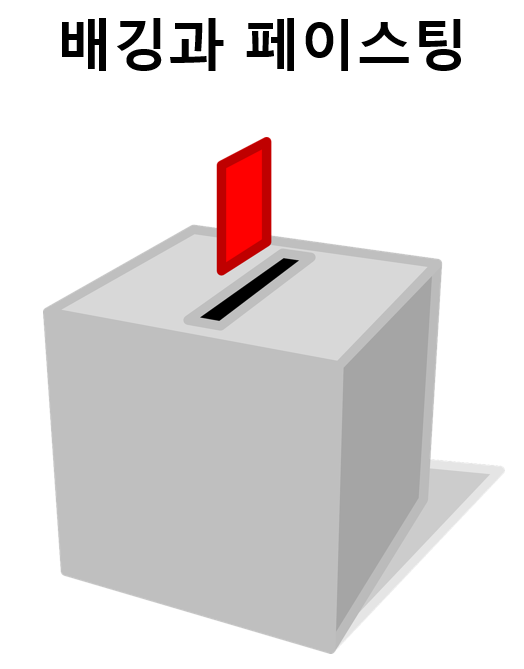

* 앙상블 모형의 좋은 성능을 내기 위해서는 다양한 종류의 오차를 만들어야 하고, 그러기 위해서는 다양한 알고리즘을 사용해야 한다고 배웠다.
* 다양한 오차를 만들기위한 다른 하나의 방법으로는 훈련 세트의 서브셋을 무작위로 구성하여 모델을 학습시키는 것이 있다. 이를 배깅과 페이스팅이라고 부른다.
  - 배깅 : 훈련 세트의 중복을 허용하여 샘플링을 하는 방식 (통계학에서는 "부트스트래핑"이라고도 부름) 예를들어 상자에서 하나꺼내고 확인하고 다시 넣고 다시 뽑는 방식
  - 페이스팅 : 훈련 세트의 중복을 허용하지 않고 샘플링 하는 방식
배깅은 각 예측기가 학습하는 서브셋에 다양성을 증가시키므로 페이스팅보다 편향이 조금 더 높다. 모델에 제약을 많이 주면 일반화 성능이 떨이지고 편향이 늘어나게 됨
* 하지만 배깅은 예측기들의 상관관계를 줄이므로 앙상블의 분산을 감소 시킨다. 즉 편향을 좋게 하면 분산이 적어지고 분산을 좋게하면 편향이 줄어듦 편향과 분산이 트레이드오프관계가 있음
* 전반적으로 배깅이 더 나은 모델을 만들지만, 시간과 장비가 좋다면 교차검증으로 배깅과 페이스팅을 둘다 해보면 좋다.

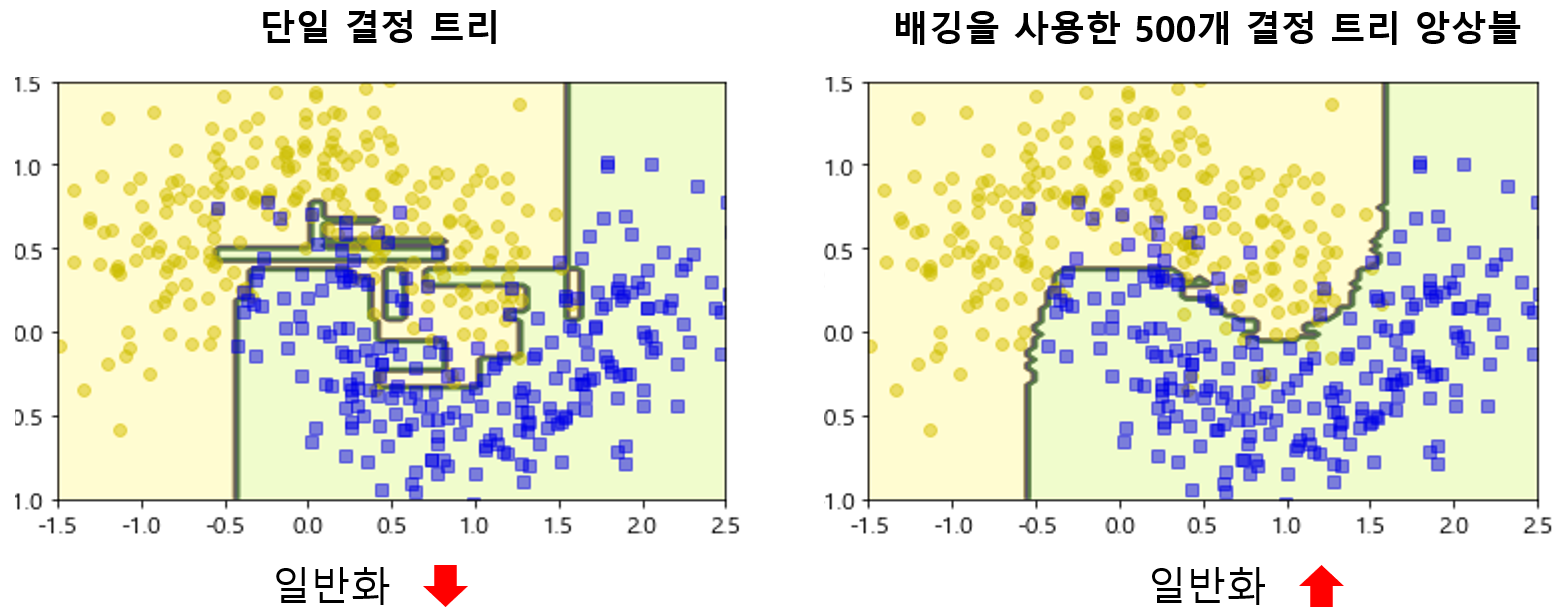

* 단일 결정 트리와 배깅을 사용한 결정트리 앙상블의 결정경계를 비교해보면 트리 앙상블이 더욱 일반화가 잘 된것을 확인할 수 있다.

# 2.oob 평가
* 배깅(중복 허용 샘플링)을 하다보면 평균적으로 훈련 샘플의 약 63%정도만 추출되고 나머지 약 37%는 추출되지 않고, 이렇게 추출되지 않은 샘플들을 oob(out-of-bag)샘플이라고 부른다.
* 예측기가 훈련되는 동안에는 oob샘플을 사용하지 않으므로, 검증 세트나 교차 검증을 사용하지 않고 oob샘플만을 가지고 모델 최적화를 위한 평가를 할 수 있다.
* 앙상블의 평가는 각 예측기의 oob평가의 평균으로 확인한다.

# 랜덤 패치와 랜덤 서브스페이스
* 위에서는 훈련 샘플을 랜덤 샘플링하여 각 예측기의 오차 다양성을 주었지만, 이번에는 훈련 데이터들의 입력 특성들을 무작위로 샘플링하여 예측기를 만들어서 예측기에 대한 오차 다양성을 줄 수 있다.
* 훈련 데이터들의 입력 특성들을 무작위로 샘플링하는 것을 랜덤 패치 방식과 랜덤 서브스페이스 방식이라고 한다.
* 랜덤 패치 방식 : 훈련 특성과 샘플을 모두 샘플링하는 방식
  - ex) (bootstrap=True or False, max_samples<1.0, bootstrap_features=True, max_features<1.0)
* 랜덤 서브스페이스 방식 : 훈련 샘플은 모두 사용하고, 특성만 샘플링 하는 것
  - ex) (bootstrap=False, max_samples=1.0, bootstrap_features=True, max_features<1.0)

#4. 랜덤포레스트

* 랜덤포레스트는 일반적으로 배깅방법을 사용한 결정트리 앙상블 모델이다.
* 그래서 BaggingClassifier에 DecisionTreeClassifier를 넣는 대신, RandomForestClassifier를 사용할 수 있다.
* 그래서 RandomForestClassifier는 DecisionTreeClassifier와 BaggingClassifier 매개변수 모두 가지고 있다.
* 랜덤포레스트 모델은 트리의 노드를 분할할 때 전체 특성 중에서 최선의 특성을 찾는 것이 아니라, 무작위로 선택한 특성들 중에서 최선의 특성을 찾는 방식을 채택하여 무작위성을 더 가지게 된다.
* 이를 통해 약간의 편향은 손해보지만, 더욱 다양한 트리를 만들므로 분산을 전체적으로 낮추어서 더 훌륭한 모델을 만들 수 있다.

BaggingClassifier에 DecisionTreeClassifier를 넣는 대신, RandomForestClassifier를 사용

# 1. 엑스트라 트리

* 랜덤포레스트는 앞에서 말한 것 처럼 각 노드에서 무작위로 특성을 뽑은 다음 최적의 특성과 임계값을 선택한다.
* 하지만 엑스트라 트리는 최적의 특성과 임계값을 찾는것 대신, 후보 특성을 사용해 무작위로 분할한 다음에 최상을 분할을 선택한다.
* 이렇게되면 기본적으로 편향이 많은 랜던포레스트보다 더욱 편향이 심해지지만, 분산을 더욱 낮출 수 있게 된다.
* 트리 알고리즘에서는 모든 노드에서 최적의 특성과 임계값을 고르는데 시간이 많이 들지만, 엑스트라 트리를 사용하면 훈련과 예측속도가 빨라진다.
* 엑스트라 트리는 ExtraTreesClassifier를 이용하면 사용할 수 있다.
* RandomForestClassifier와 ExtraTreesClassifier 중 어떤 것이 더 좋을지는 판단하기 어렵기 때문에, 교차검증을 통해서 서로 비교해보고, 더 나은 모델을 선택하여 그리드 탐색방법을 사용해 하이퍼파라미터 튜닝을 한다.

# 2. 특성 중요도

* 랜덤포레스트는 성능이 좋다는 장점말고, 특성의 상대적 중요도를 측정하기 쉽다.(트리기반 모델은 특성 중요도 제공)
* 사이킷런에서는 어떤 특성을 사용한 노드가 평균적으로 불순도를 감소시키는지 확인하여 특성 중요도를 측정하고, 훈련이 끝나고 난 뒤에 특성마다 자동으로 점수를 계산하고 저장한다.
* 저장된 값은 featureimportances 변수에 저장되어 있다.

#5.부스팅
* 부스팅이란, 약한 학습기를 여러 개들을 서로 연결하고 보완해가면서 더욱 강한 학습기를 만드는 앙상블 방법이다.
* 다양한 부스팅 방법들이 있지만, 그중에서 가장 인기있는 에이다 다부스트와 그래디언트 부스팅을 소개하겠다.

5-1 에이다 부스트

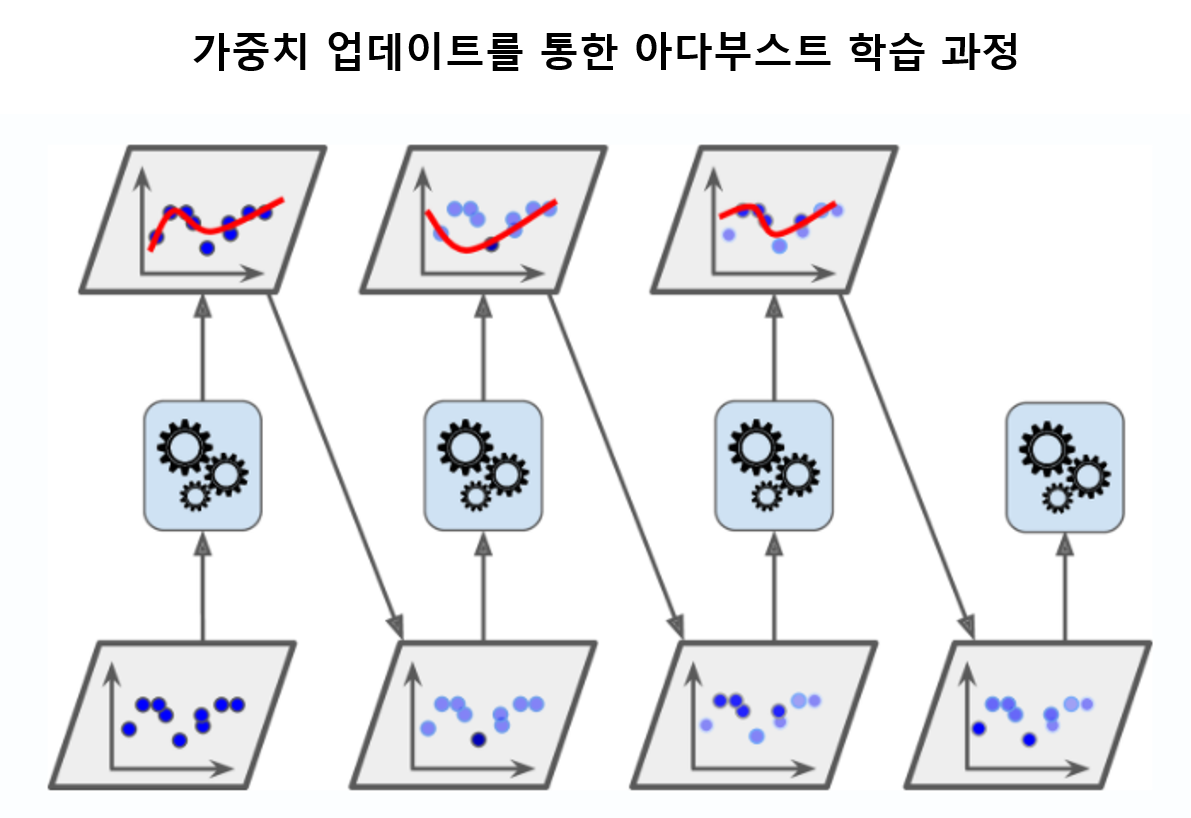

- 아다부스트의 아이디어는 이전 예측기가 과소적합되었던 훈련 샘플의 가중치를 더 높이는 것이다.
- 이 덕분에 새로운 예측기는 학습하기 어려운 샘플에 대해 더욱 잘 예측하게 된다.
- 예를들어보면,아다부스트에서 첫 번째 예측기를 결정트리로 훈련시키고 예측을 했을 때, 잘못 분류된 훈련 샘플에 대해 가중치를 상대적으로 높이고, 두 번째에는 업데이트된 가중치를 통해서 예측의 오분류를 확인하고 가중치를 높일 것인지 낮출 것인지 결정되면서 반복된다.
- 사이킷런에서 제공하는 아다부스트는 다음과 같이 수행해볼 수 있다.

5-2 그래디언트 부스팅
 
* 그래디언트 부스팅은 에이다다부스팅과 비슷하게 학습 샘플에 대해 오차를 보정하면서 순차적으로 예측기를 추가 한다.
* 하지만 차이점은 에이다부스트처럼 각 학습 샘플에 대한 가중치를 업데이트 하는 대신, 이전 예측기가 만든 잔차(residual error)에 새로운 예측기를 학습시키는 것이다.
* 결정트리를 예측기로 활용하여 그래디언트 부스팅의 회귀 문제를 수행해 보겠고, 결정트리와 그래디언트 부스팅을 함께 적용한 이 알고리즘을 보통 그래디언트 부스티드 회귀 트리(Gradient Boosted Regression Tree = GBRT)라고 부른다.


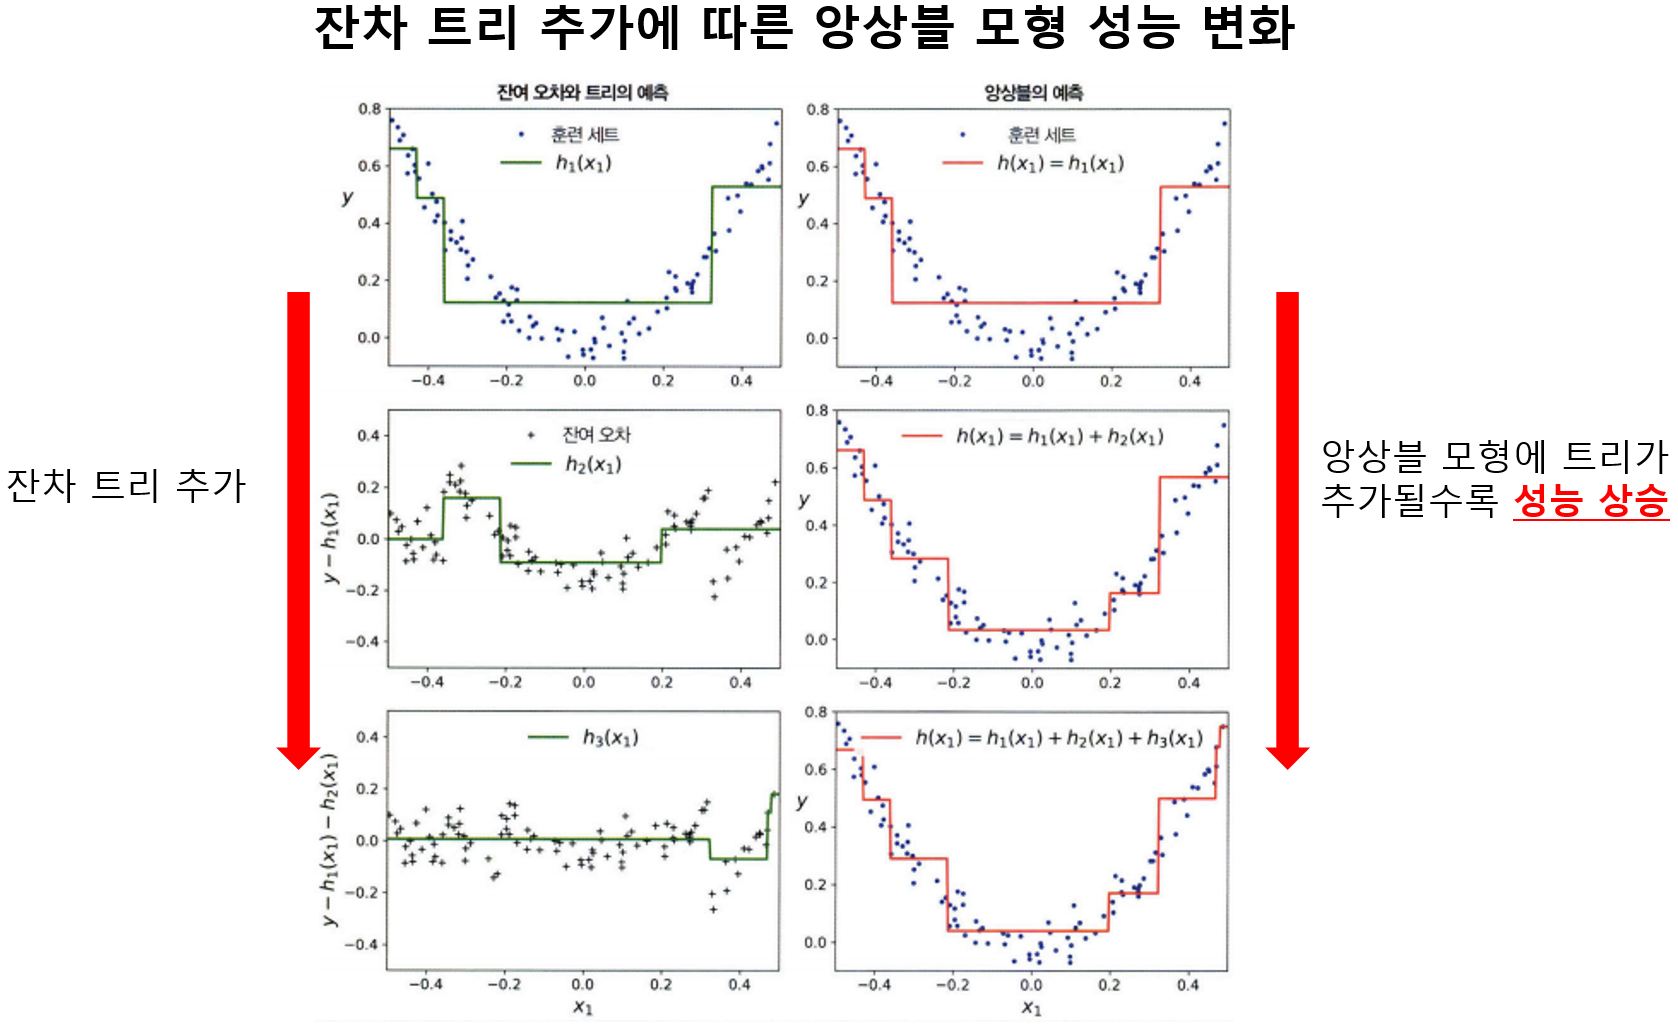

GradientBoostingRegressor(learning_rate=1, n_estimators=3)

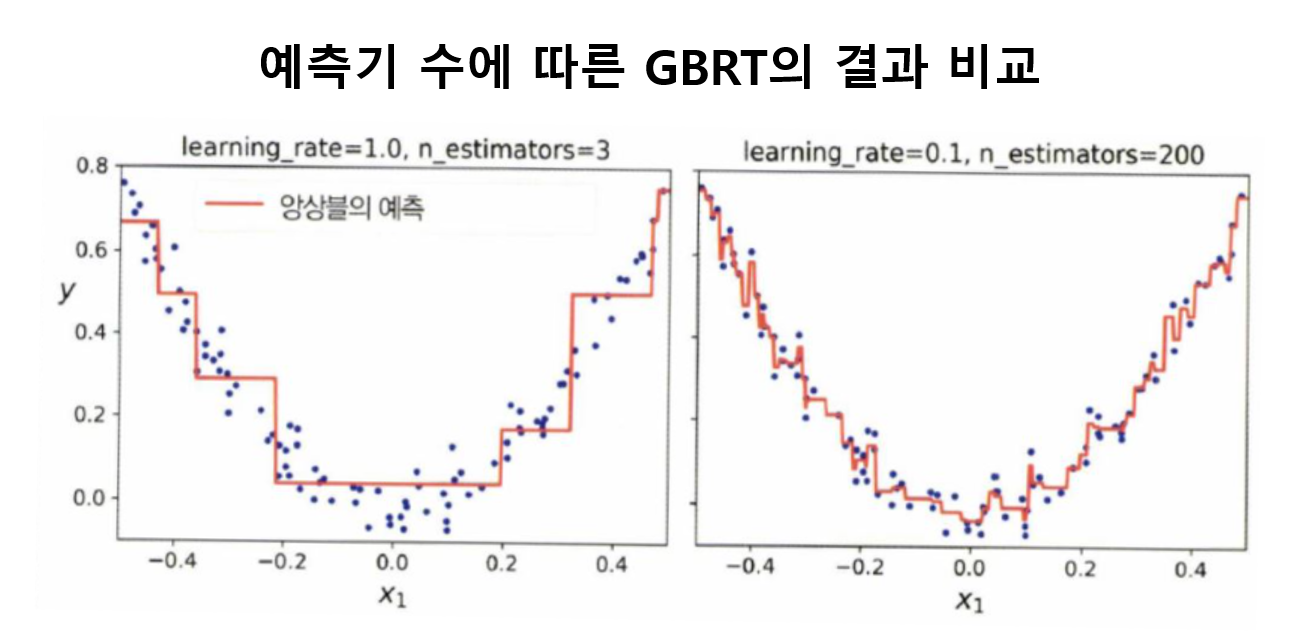

* 왼쪽의 경우에는 훈련 세트를 학습하기 위한 불충분한 예측기 수로 인해 과소적합문제, 오른쪽은 훈련 세트에 대한 예측기 과다로 인해 발생한 과적합 문제를 보여준다.
* 최적의 예측기 수를 찾는 간단한 방법은 다음과 같다.

조기종료(early stopping)를 활용하는 방법
 

지금까지 머신러닝을 배우기 위한 대부분의 기본 개념을 익혀보았다. 물론 모든 챕터의 개념을 세세하게 리딩한 것은 아니나, 지금까지의 내용을 토대로 각 모델에 대한 개념을 깊게 공부해본다면 지금보다 더 깊은 이해할 가질 수 있게 될 것이다.  